---
title: "Exploratory Data Analysis"
format:
    html: 
        code-fold: false
---

{{< include overview.qmd >}} 

# Code 


In [72]:
# ------------------------------------ IMPORTS ------------------------------------ #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import kstest, chi2_contingency, ttest_ind, f_oneway

# read in data
df = pd.read_csv('../../data/processed-data/dc_bike_routes.csv')
df.head()

,name,distance_mi,terrain,traffic,scenery,distance_norm,unpaved,flat,workout,park,river,loop,sentiment,state1,state2
0,Potomac Tour,10,1,2,2,-0.963394,0,0,0,0,0,0,0.4215,DC,DC
1,BWI Trail,11,2,1,3,-0.933354,0,0,0,0,0,0,0.0000,MD,MD
2,Airpark Cruise,12,3,3,3,-0.903313,1,0,1,1,0,0,0.0000,MD,MD
3,Seneca Valley Tour,13,3,3,2,-0.873273,0,0,1,1,0,0,0.6249,MD,MD
4,For The Boyds,14,2,3,2,-0.843232,1,0,1,1,0,0,0.0000,MD,MD


       distance_mi  sentiment
count    43.000000  43.000000
mean     42.069767   0.280684
std      33.682266   0.374312
min      10.000000  -0.599400
25%      22.000000   0.000000
50%      30.000000   0.421500
75%      48.500000   0.611650
max     184.000000   0.911500


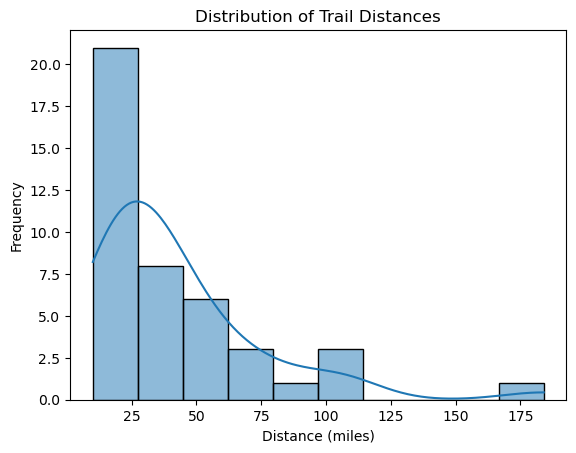

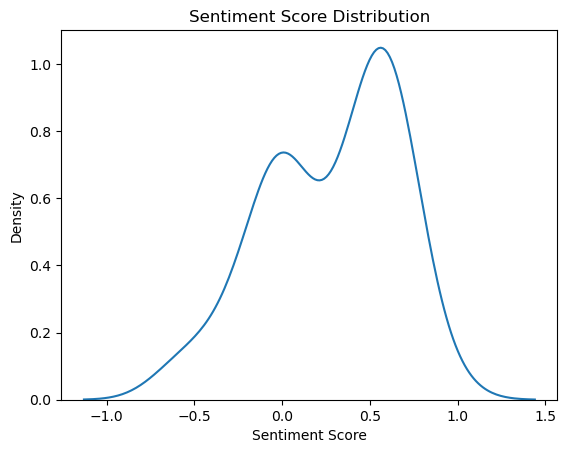

In [38]:
# ouput summary stats for numerical variables
print(df[['distance_mi', 'sentiment']].describe())

# plot distribution of distances
sns.histplot(df['distance_mi'], kde=True, bins=10)
plt.title('Distribution of Trail Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

# plot distribution of sentiment scores
sns.kdeplot(df['sentiment'])
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.show()

   terrain  traffic  scenery
1        9      6.0     18.0
2       11     13.0     16.0
3       19     19.0      9.0
4        2      5.0      NaN
5        2      NaN      NaN
   unpaved  flat  workout  park  river  loop
0       26    42       40    38     40    31
1       17     1        3     5      3    12


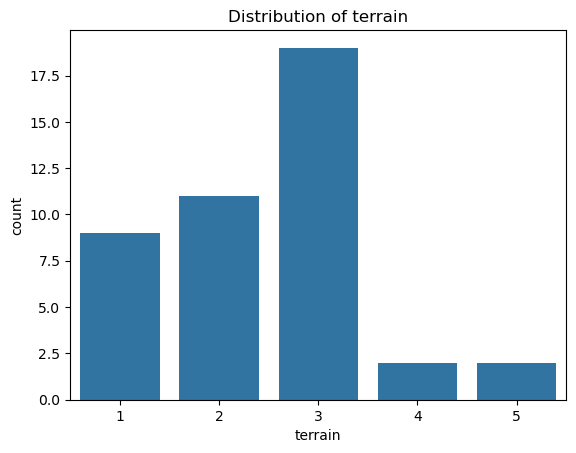

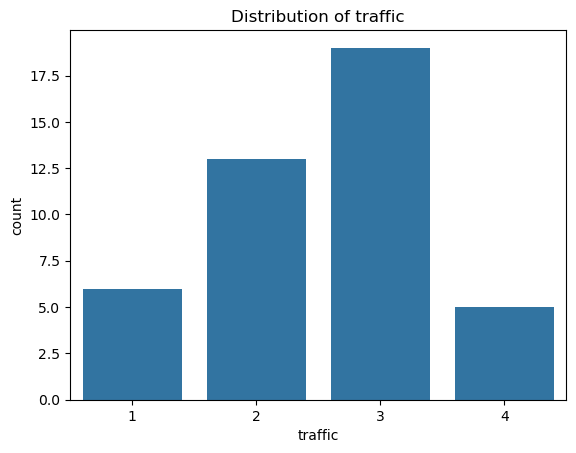

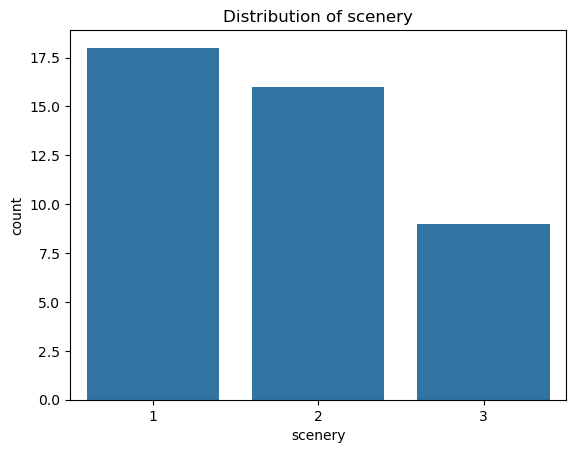

In [39]:
# Count occurrences of each category for ranking variables
rank_counts = df[['terrain', 'traffic', 'scenery']].apply(lambda x: x.value_counts())
print(rank_counts)
# Count occurances of each binary for labeling variables
binary_counts = df[['unpaved', 'flat', 'workout', 'park', 'river', 'loop']].apply(lambda x: x.value_counts())
print(binary_counts)

# Plot distribution of ranking variables
for col in ['terrain', 'traffic', 'scenery']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

             distance_mi  sentiment   terrain   traffic   scenery
distance_mi     1.000000  -0.015508  0.032620  0.150934 -0.214241
sentiment      -0.015508   1.000000 -0.459373 -0.399662  0.055650
terrain         0.032620  -0.459373  1.000000  0.452589 -0.113830
traffic         0.150934  -0.399662  0.452589  1.000000  0.307563
scenery        -0.214241   0.055650 -0.113830  0.307563  1.000000


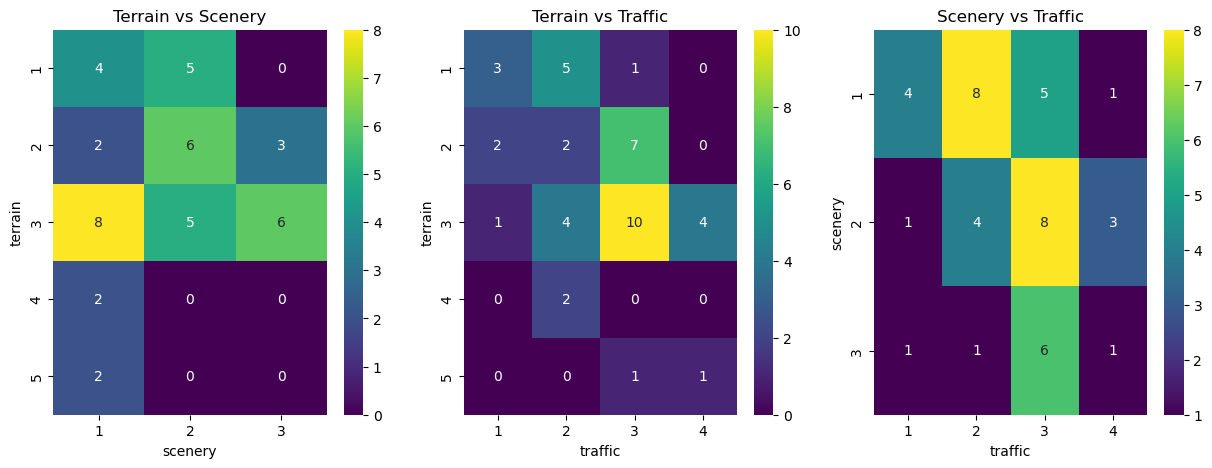

In [40]:
# calculate correlation matrix
print(df[['distance_mi', 'sentiment', 'terrain', 'traffic', 'scenery']].corr())

# Investigate relationships between categorical variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# Take crosstabulation and plot in a heatmap
crosstab1 = pd.crosstab(df['terrain'], df['scenery'])
sns.heatmap(crosstab1, ax=axes[0], annot=True, cmap='viridis')
axes[0].set_title('Terrain vs Scenery')
# Take crosstabulation and plot in a heatmap
crosstab2 = pd.crosstab(df['terrain'], df['traffic'])
sns.heatmap(crosstab2, ax=axes[1], annot=True, cmap='viridis')
axes[1].set_title('Terrain vs Traffic')
# Take crosstabulation and plot in a heatmap
crosstab3 = pd.crosstab(df['scenery'], df['traffic'])
sns.heatmap(crosstab3, ax=axes[2], annot=True, cmap='viridis')
axes[2].set_title('Scenery vs Traffic')
plt.show()

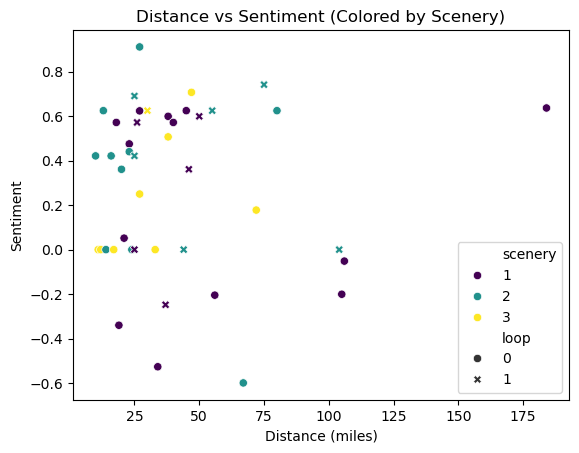

In [41]:
# visualize distance against sentiment to see if longer trails correlate with higher sentiment
# color points based on scenery score and style them based on if ther are a loop
sns.scatterplot(data=df, x='distance_mi', y='sentiment', hue='scenery', style='loop', palette='viridis')
plt.title('Distance vs Sentiment (Colored by Scenery)')
plt.xlabel('Distance (miles)')
plt.ylabel('Sentiment')
plt.show()

In [ ]:
# Break columns into respective groups, continuous, categorical, binary
cont_vars = ['sentiment', 'distance_mi'] #, 'distance_norm']
cat_vars = ['traffic', 'scenery', 'terrain', 'state1', 'state2']
bin_vars = ['unpaved', 'flat', 'workout', 'park', 'river', 'loop']# Check continuous numeric vars for normality

# test numeric varaibles for normality
for var in cont_vars:
    # Perform KS test, compare obs distribution with expected normal distribution
    stat, p = kstest(df[var], 'norm', args=(np.mean(df[var]), np.std(df[var])))
    # simple if statement to interpret result
    if p > 0.05:
        print(f"{var} appears to be normally distributed (p-value={p}).")
    else:
        print(f"{var} does not appear to be normally distributed (p-value={p}).")

sentiment appears to be normally distributed (p-value=0.19893260966830684).
distance_mi appears to be normally distributed (p-value=0.09142254585650134).


In [ ]:
# Statistical testing
# T-test

# iterate over the continuous variables
for var1 in cont_vars:
    # print statement which variable you are comparing means of
    print(f'Means Across {var1.capitalize()}')
    # Initialize lists to store test stats and pvals
    ts = []
    pvals = []
    # iterate over the binary variables
    for var2 in bin_vars:
        # make seperate lists for routes with 0 or 1 for current variable
        zeros = df[df[var2]==0][var1]
        ones = df[df[var2]==1][var1]
        # conduct the t test
        ttest = ttest_ind(zeros, ones)
        # append the test stat and pvalue to their lists
        ts.append(ttest.statistic)
        pvals.append(ttest.pvalue)
        # optional output
        # print(f'T-Test for {var2}: t={ttest.statistic}, p-val={ttest.pvalue}')
    # Combine into orderly data frame for output
    print(pd.DataFrame({'variable':bin_vars, 'T-stat': ts, 'p-values':pvals}), '\n')

Means Across Sentiment
  variable    T-stat  p-values
0  unpaved -0.798712  0.429060
1     flat -1.255270  0.216489
2  workout  0.343609  0.732897
3     park  1.252806  0.217375
4    river  0.273525  0.785823
5     loop -0.925050  0.360353 

Means Across Distance_mi
  variable    T-stat  p-values
0  unpaved -0.337290  0.737619
1     flat -0.988985  0.328471
2  workout  1.577108  0.122456
3     park  0.692671  0.492421
4    river  0.836002  0.407999
5     loop -0.371249  0.712363 



In [ ]:
# Chi-square
# use combinations to find all non repeated pars of categorical variables
pairs = list(combinations(cat_vars, 2))
# Initialize lists to store test stats and pvals
chi2s = []
pvals = []
# iterate over the pairs of categorical variables
for pair in pairs:
    # construct contingency table of current pair
    contingency_table = pd.crosstab(df[pair[0]], df[pair[1]])
    # conduct the chi square test
    chi2 = chi2_contingency(contingency_table)
    # append the test stat and pvalue to their lists
    chi2s.append(chi2.statistic)
    pvals.append(chi2.pvalue)
    # optional output
    # print(f'Chi-Square test for {pair[0]} and {pair[1]}:\n\t chi2={chi2.statistic},\n\t p-val={chi2.pvalue}')
# Combine into orderly data frame for output
print(pd.DataFrame({'pair':pairs, 'Chi2 Stat': chi2s, 'p-values':pvals}))

                 pair     T-stat      p-values
0  (traffic, scenery)   7.569852  2.713401e-01
1  (traffic, terrain)  21.859405  3.912610e-02
2   (traffic, state1)   5.661211  7.732882e-01
3   (traffic, state2)   6.185171  7.212520e-01
4  (scenery, terrain)  12.476579  1.311730e-01
5   (scenery, state1)   6.288026  3.917107e-01
6   (scenery, state2)   5.302261  5.056705e-01
7   (terrain, state1)  22.436062  3.291347e-02
8   (terrain, state2)  15.650236  2.077861e-01
9    (state1, state2)  67.104056  5.612906e-11


In [ ]:
# ANOVA
# iterate over the continuous variables
for var1 in cont_vars:
    # print statement which variable you are comparing means of
    print(f'Means Across {var1.capitalize()}')
    # Initialize lists to store test stats and pvals
    fs = []
    pvals = []
    # iterate over the categorical variables
    for var2 in cat_vars:
        # get unique categories from current variable
        groups = df[var2].unique()
        # for each unique category, subset and get the current continuous column
        group_data = [df[df[var2] == category][var1] for category in groups]
        # conduct the one way anova test, test across the categories in the current variable
        anova = f_oneway(*group_data)
        # append the test stat and pvalue to their lists
        fs.append(anova.statistic)
        pvals.append(anova.pvalue)
        # print(f'ANOVA Test for {var2}: f={f_oneway.statistic}, p-val={f_oneway.pvalue}')
    # Combine into orderly data frame for output
    print(pd.DataFrame({'variable':cat_vars, 'F-stat': fs, 'p-values':pvals}), '\n')

Means Across Sentiment
  variable    F-stat  p-values
0  traffic  2.693770  0.059227
1  scenery  0.506293  0.606536
2  terrain  3.067727  0.027668
3   state1  1.543986  0.218446
4   state2  0.474775  0.701643 

Means Across Distance_mi
  variable    F-stat  p-values
0  traffic  1.793229  0.164421
1  scenery  0.981119  0.383731
2  terrain  0.954898  0.443290
3   state1  0.392242  0.759249
4   state2  0.742856  0.533016 

